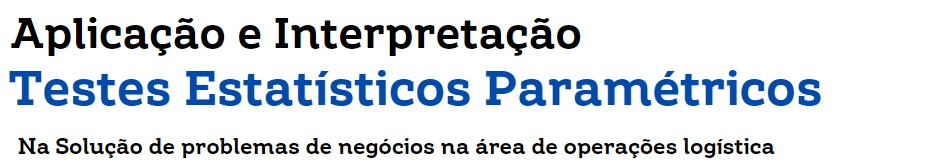

## Instalando e Carregando os Pacotes

In [1]:
# Imports
import scipy
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import shapiro, ttest_ind, levene, bartlett, f_oneway
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy.stats import kruskal

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Marcus lopes"

Author: Marcus lopes



## Problema  de Negocio 01

Uma empresa de varejo está avaliando a precisão da contagem de inventário cíclico em dois armazéns distintos, com o objetivo de melhorar a acuracidade das contagens e otimizar a gestão de estoque.

**Cenário 1:** O Armazém A está testando um novo sistema de contagem de estoque, que o fornecedor garante ser o mais eficiente do mercado. O sistema promete uma acuracidade acima da média e oferece uma série de benefícios adicionais. O teste será realizado por 12 dias para avaliar sua eficácia.

**Cenário 2:** O Armazém B continua utilizando o sistema de contagem de estoque antigo da empresa, que tem sido utilizado de forma consistente ao longo do tempo.

O objetivo é determinar qual sistema de contagem oferece maior precisão. Após o período de 12 dias, será realizada uma análise comparativa das médias de acuracidade entre os dois cenários. Essa análise ajudará a identificar se há uma diferença significativa na acuracidade das contagens entre o novo e o antigo sistema, fornecendo dados essenciais para a decisão de investimento na atualização ou manutenção dos sistemas de contagem de estoque.

### 1 -  Qual o teste que será empregado?

Para analisar o problema de negócio, começaremos com o teste paramétrico **Teste t de Student.**

* O Teste t de Student é utilizado para verificar se há uma diferença significativa entre as médias de dois grupos, assumindo que as distribuições desses grupos são normais.
<br>

* Dentro da variantes do teste t, o que será usado nesse problema de negócio é o **Teste t de duas amostras independentes que compara as médias de duas amostras independentes.**



### 1.1 - Formulação das hipóteses do teste t de duas amostras independentes

As hipóteses para este teste são formuladas da seguinte maneira:

* **Hipótese Nula (H0):** Não há diferença significativa entre as médias das duas populações.
<br>

* **Hipótese Alternativa (H1 ou Ha):** Existe uma diferença significativa entre as médias das duas populações.
<br>

* **O valor-p:** No teste t de duas amostras independentes, o valor-p será utilizado para determinar se existe uma diferença significativa entre as médias dessas amostras. A interpretação do valor-p depende do nível de significância escolhido para o teste, frequentemente representado por α (alfa).
<br>

* **O nível de significância:** É a probabilidade de rejeitar a hipótese nula quando ela é verdadeira (erro do tipo I). Os valores mais comuns para α são **0,05 (5%) ou 0,01 (1%).** Na resolução desse problema de negócio usaremos 0,05
<br>

* **Interpretação do valor-p:**
<br>

* **Se o valor-p ≤ α:** Há evidências estatísticas suficientes para rejeitar a hipótese nula. Isso indica que existe uma diferença significativa entre as médias das duas populações.
<br>

* **Se o valor-p > α:** Não há evidências estatísticas suficientes para rejeitar a hipótese nula. Isso indica que não há diferença significativa entre as médias das duas populações, com base nos dados da amostra e no nível de significância escolhido.

### 1.2 - Suposições que o teste t de duas amostras independentes pressupõe 

O teste t de duas amostras independentes pressupõe que as amostras são:

* **Aleatórias**.
* **Independentes entre si**.
* Que as populações de origem tenham **distribuições normais** com variâncias iguais (homocedasticidade).

O teste t de duas amostras independentes depende significativamente da suposição de que os dados seguem uma distribuição normal. Se essa suposição não for atendida, outros testes, como testes não paramétricos, podem ser mais apropriados ou ajustes nos procedimentos.

Para verificar a normalidade dos dados, utilizaremos o **Teste de Shapiro-Wilk**, que será aplicado separadamente aos dados de acuracidade de estoque de cada armazém.

O resultado do Teste de Shapiro-Wilk será intepretado da seguinte forma:

* Caso o Valor-p obtido nesse teste for maior que o nível de significância (tipicamente 0.05), então não temos evidências suficientes para rejeitar a hipótese nula de normalidade, sugerindo que os dados podem ser considerados normalmente distribuídos. 
<br>

* Se o p-valor for menor que o nível de significância, há evidências suficientes para rejeitar a hipótese de normalidade, indicando que os dados podem não seguir uma distribuição normal.

### 1.3 - Executando teste t de duas amostras independentes

In [3]:
# Precisão da acuracidade do inventário no Armazém A e B em 12 dias (em porcentagem)

armazem_A = np.array([95.5, 96.6, 94.4, 95.5, 96.6, 95.5, 94.4, 92.2, 94.4, 92.2, 95.5])
armazem_B = np.array([94.4, 95.5, 93.3, 93.3, 94.4, 94.4, 96.6, 94.4, 96.6, 93.3, 95.6])

In [4]:
# Realizando o teste t de duas amostras independentes
t_stat, p_valor = ttest_ind(armazem_A, armazem_B)

In [5]:
print(f"Estatística t: {t_stat:.3f}")
print(f"Valor-p: {p_valor:.3f}")

Estatística t: 0.156
Valor-p: 0.878


### 1.4 - Interpretando a estatística t no teste t de duas amostras independentes

A estatística t no teste t de duas amostras independentes é uma medida da diferença entre as médias das duas amostras em relação à variabilidade combinada das duas amostras.

**Valor de t próximo de zero:** Indica que a diferença entre as médias das duas amostras é pequena em relação à variabilidade das amostras. Isso sugere que não há uma diferença significativa entre as duas populações.

**Valor de t positivo:** Indica que a média da primeira amostra é maior do que a média da segunda amostra. Quanto maior o valor de t, maior é a diferença entre as médias em relação à variabilidade.

**Valor de t negativo:** Indica que a média da primeira amostra é menor do que a média da segunda amostra. Novamente, quanto maior o valor absoluto de t, maior é a diferença entre as médias em relação à variabilidade.

### 1.5 - Interpretando o Valor-p no teste t de duas amostras independentes

In [6]:
# Interpretando o resultado
nivel_significancia = 0.05

if p_valor <= nivel_significancia:
    print("Há evidências suficientes para rejeitar a hipótese nula. "
          "Existe uma diferença significativa entre as médias da acuracidade do estoque do armazém A e armazém B.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. "
          "Não existe uma diferença significativa entre as médias da acuracidade do estoque do armazém A e armazém B.")


Não há evidências suficientes para rejeitar a hipótese nula. Não existe uma diferença significativa entre as médias da acuracidade do estoque do armazém A e armazém B.


### 1.6- Executando o teste de Shapiro-Wilk e confirmando a normalidade dos dados 

In [7]:
# Teste de Shapiro-Wilk para verificar a normalidade
stat_A, p_A = shapiro(armazem_A)
stat_B, p_B = shapiro(armazem_B)

In [8]:
print(f"Resultado do teste de Shapiro-Wilk para o armazém_A: Estatística={stat_A:.3f}, Valor-p={p_A:.3f}")
print(f"Resultado do teste de Shapiro-Wilk para o armazém_B: Estatística={stat_B:.3f}, Valor-p={p_B:.3f}")

Resultado do teste de Shapiro-Wilk para o armazém_A: Estatística=0.865, Valor-p=0.067
Resultado do teste de Shapiro-Wilk para o armazém_B: Estatística=0.879, Valor-p=0.100


In [9]:
# Interpretando os resultados

nivel_significancia = 0.05

if p_A > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de normalidade dos dados da Acuarcidade do armazém A.")
else:
    print("Há evidências suficientes para rejeitar a hipótese de normalidade dos dados da Acuarcidade do Armazém A.")

if p_B > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de normalidade dos dados da Acuarcidade do armazém B.")
else:
    print("Há evidências suficientes para rejeitar a hipótese de normalidade dos dados da Acuarcidade do armazém B.")

Não há evidências suficientes para rejeitar a hipótese de normalidade dos dados da Acuarcidade do armazém A.
Não há evidências suficientes para rejeitar a hipótese de normalidade dos dados da Acuarcidade do armazém B.


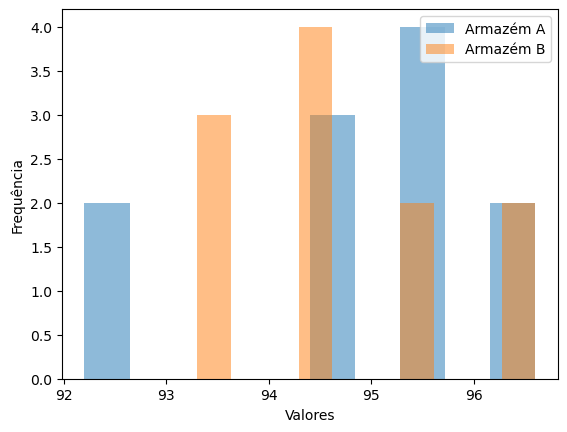

In [10]:
# Visualiza as distribuições das amostras
plt.hist(armazem_A, bins = 10, alpha = 0.5, label = "Armazém A")
plt.hist(armazem_B, bins = 10, alpha = 0.5, label = "Armazém B")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.legend(loc = "upper right")
plt.show()

### 1.7- Recomendação ao Tomador de Decisão 

Valor p que indica que provavelmente não há evidências suficientes para rejeitar a hipótese nula. Não existe uma diferença estatística significativa entre as médias da acurácia do estoque do armazém A e armazém B, conforme indicado pela estatística do teste t de duas amostras independentes, que resultou próximo de zero. Isso sugere que a diferença entre as médias das duas amostras é pequena em relação à variabilidade das amostras, não havendo uma diferença significativa entre as duas populações. Provavelmente, tanto o sistema utilizado no cenário 01 quanto no cenário 02 não apresentavam uma diferença estatística significativa entre as médias da acurácia do estoque do armazém A e B.

### --------------------------------------------------------------------------------------------------------------------------------

### Problema de Negocio 02

Uma empresa de logística recebe regularmente produtos de dois fornecedores distintos, **Fornecedor A e Fornecedor B**, ambos fornecendo o mesmo tipo de produto. A empresa está interessada em investigar se existe uma **diferença estatística significativa na média de avarias entre os produtos recebidos desses dois fornecedores**. Foram coletadas as médias de avarias dos produtos recebidos ao longo de 313 dias. 
<br>

**O objetivo** da empresa é melhorar sua gestão de estoque e planejamento de compras com base em dados estatísticos concretos sobre a qualidade dos produtos recebidos, visando tomar uma decisão informada no final do ano sobre qual fornecedor continuará.

### 1- Carregando os Dados do Problema de Negócio

In [11]:
# carregando os daddos das avarias de cada fornecedor 

dfav = pd.read_csv("C:\\Arquivos\\avarias_fornecedor.csv",encoding = "ISO-8859-1")

In [12]:
# Configurando o data ser para mostrar números inteiros sem casas decimais
pd.options.display.float_format = '{:.0f}'.format

In [13]:
# Verificar as primeiras linhas do dataframe
dfav.head()

,avarias_fornecedor_A,avarias_fornecedor_B
0,9,6
1,6,7
2,7,7
3,9,6
4,9,7


### 1.1- Executando o teste de Shapiro-Wilk para confirmar a normalidade dos dados 

In [14]:
# Teste de Shapiro-Wilk para verificar a normalidade

# Aplicar o teste de Shapiro-Wilk em cada coluna
stat_A, p_A = shapiro(dfav['avarias_fornecedor_A'])
stat_B, p_B = shapiro(dfav['avarias_fornecedor_B'])


In [15]:
print(f"Resultado do teste de Shapiro-Wilk para as avarias do fornecedor_A: Estatística={stat_A:.3f}, Valor-p={p_A:.3f}")
print(f"Resultado do teste de Shapiro-Wilk para as avarias do fornecedor_B: Estatística={stat_B:.3f}, Valor-p={p_B:.3f}")

Resultado do teste de Shapiro-Wilk para as avarias do fornecedor_A: Estatística=0.994, Valor-p=0.231
Resultado do teste de Shapiro-Wilk para as avarias do fornecedor_B: Estatística=0.996, Valor-p=0.566


In [16]:
# Interpretando os resultados

nivel_significancia = 0.05

if p_A > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de normalidade dos dados das avarias do Fornecedor_A.")
else:
    print("Há evidências suficientes para rejeitar a hipótese de normalidade dos dados das avarias do Fornecedor_A.")

if p_B > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de normalidade dos dados das avarias do Fornecedor_B.")
else:
    print("Há evidências suficientes para rejeitar a hipótese de normalidade dos dados da avarias do Fornecedor_B.")

Não há evidências suficientes para rejeitar a hipótese de normalidade dos dados das avarias do Fornecedor_A.
Não há evidências suficientes para rejeitar a hipótese de normalidade dos dados das avarias do Fornecedor_B.


**Observação:** O teste de Shapiro-Wilk confirmou a normalidade dos dados. O teste t de duas amostras independentes é adequado para situações onde os dados seguem uma distribuição normal. No caso deste problema de negócios, que envolve a comparação entre duas médias, a confirmação da normalidade das amostras indica que o teste t de duas amostras independentes é apropriado para a análise.

### 1.2 - Executando teste t de duas amostras independentes

As hipóteses para este teste são formuladas da seguinte maneira:

* **Hipótese Nula (H0):** Não há diferença significativa entre as médias das duas populações.
<br>

* **Hipótese Alternativa (H1 ou Ha):** Existe uma diferença significativa entre as médias das duas populações
<br>

* **O valor-p:** No teste t de duas amostras independentes será utilizado para determinar se existe uma diferença estatisticamente significativaentre entre as médias dessas amostras. A interpretação do valor-p depende do nível de significância escolhido para o teste, frequentemente representado por α (alfa).
<br>

* **O nível de significância** é a probabilidade de rejeitar a hipótese nula quando ela é verdadeira (erro do tipo I).Os valores mais comuns para α são 0,05 (5%) ou 0,01 (1%). **No nosso caso estamos usando 0,05**
<br>

* **Interpretação do valor-p:**
<br>

* **Se o valor-p ≤ α:** Há evidências estatísticas suficientes para rejeitar a hipótese nula. Isso indica que existe uma diferença significativa entre as médias das duas populações.
<br>

* **Se o valor-p > α:** Não há evidências estatísticas suficientes para rejeitar a hipótese nula. Isso indica que não há diferença significativa entre as médias das duas populações, com base nos dados da amostra e no nível de significância escolhido.

In [17]:
# Realizando o teste t de duas amostras independentes
t_stat, p_valor = ttest_ind(dfav['avarias_fornecedor_A'], dfav['avarias_fornecedor_B'])

In [18]:
print(f"Estatística t: {t_stat:.3f}")
print(f"Valor-p: {p_valor:.3f}")

Estatística t: -8.945
Valor-p: 0.000


### 1.3 - Interpretando a estatística t no teste t de duas amostras independentes

A estatística t no teste t de duas amostras independentes é uma medida da diferença entre as médias das duas amostras em relação à variabilidade combinada das duas amostras.

* **Valor de t próximo de zero:** Indica que a diferença entre as médias das duas amostras é pequena em relação à variabilidade das amostras. Isso sugere que não há uma diferença significativa entre as duas populações.
<br>

* **Valor de t positivo:** Indica que a média da primeira amostra é maior do que a média da segunda amostra. Quanto maior o valor de t, maior é a diferença entre as médias em relação à variabilidade.
<br>

* **Valor de t negativo:** Indica que a média da primeira amostra é menor do que a média da segunda amostra. Novamente, quanto maior o valor absoluto de t, maior é a diferença entre as médias em relação à variabilidade.

### 1.4 - Interpretando o Valor-p no teste t de duas amostras independentes

In [19]:
# Interpretando o resultado

nivel_significancia = 0.05

if p_valor <= nivel_significancia:
    print("Há evidências suficientes para rejeitar a hipótese nula. Existe uma diferença significativa entre \
as médias das avarias do Fornecedor A e Fornecedor B.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. Não existe uma diferença significativa entre \
as médias das avarias do Fornecedor A e Fornecedor B")

Há evidências suficientes para rejeitar a hipótese nula. Existe uma diferença significativa entre as médias das avarias do Fornecedor A e Fornecedor B.


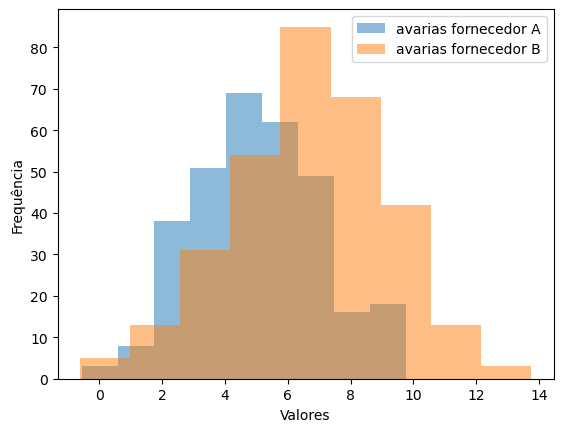

In [20]:
# Visualiza as distribuições das amostras
plt.hist(dfav['avarias_fornecedor_A'], bins=9, alpha=0.5, label="avarias fornecedor A")
plt.hist(dfav['avarias_fornecedor_B'], bins=9, alpha=0.5, label="avarias fornecedor B")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.legend()
plt.show()

### 1.5 - Recomendação ao Tomador de Decisão

O valor p encontrado sugere que há evidências suficientes para rejeitar a hipótese nula, indicando uma diferença estatisticamente significativa entre as médias de avarias do Fornecedor A e Fornecedor B. O valor negativo da estatística do teste t de duas amostras independentes indica que a média das avarias do Fornecedor A é menor do que a média das avarias do Fornecedor B. Isso sugere que, provavelmente, as peças do Fornecedor A apresentam menos avarias comparadas às do Fornecedor B.

In [21]:
%reload_ext watermark
%watermark -a "Marcus lopesy"

Author: Marcus lopesy



### FIM